# Introduction to RDKit - Part I

V.F. Scalfani, University of Alabama Libraries

Fall 2024

## Anticipated Length of Workshop

**Part I**

1 hour

**Part II**

1 hour

## Important Notes

This notebook is part of the Retrosynthesis Workshop materials, which aim to introduce computational cheminformatics techniques for retrosynthesis prediction. Please note the following:

1. **Educational Purpose**: The tutorials are designed for educational purposes to help you understand cheminformatics strategies for predicting synthetic routes. They are not intended to provide practical laboratory guidance.

2. **Practical Limitations**: The methods demonstrated here are template-based and pattern-driven, meaning they rely on predefined reaction templates and do not fully capture real-world chemistry complexities. It is important to note that computational models can produce inaccurate or incomplete predictions due to simplifications and assumptions within the algorithms, as well as limitations in their training data. Any application of the predicted reactions would require signficant additional research, including a thorough review of the relevant literature, synthesis planning, and safety assessments. In addition, see the articles referenced throughout the Retrosynthesis Workshop notebooks to learn more about specific model limitations.

3. **Intellectual Property**: The retrosynthetic prediction techniques in the tutorials use reaction data (and/or computer models derived from this data) from U.S. patents for training purposes. Synthetic pathways suggested by these models could potentially be protected by intellectual property laws.

For further details, please refer to the [repository README](https://github.com/UA-Libraries-Research-Data-Services/retrosynthesis/blob/main/README.md), [data README](https://github.com/UA-Libraries-Research-Data-Services/retrosynthesis/blob/main/X_Data/AA_README_data) and references in the tutorials for more information. Code in the notebook is [MIT licensed](https://github.com/ualibweb/retrosynthesis/blob/main/LICENSE).


## What is the purpose of this workshop?

This workshop is designed to introduce attendees to introductory cheminformatics techniques using RDKit (https://www.rdkit.org/). RDKit is a popular C++/Python Cheminformatics toolkit. While Part I and II of this RDKit workshop can certainly be a stand alone series, we hope you will join us for the series of computer-assisted retrosynthesis workshops, where we will continue using RDKit.

Here is what we will cover below. The code content is split into two Jupyter Notebooks:

**Part I Notebook**

1. SMILES file format
2. Reading and working with molecules
3. Molecule depiction
4. Canonicalization, identifiers, and hashes
5. Chemical similarity and fingerprints
6. Substructure search

**Part 2 Notebook**

7. Descriptors
8. Reading and working with reactions
9. Reaction depiction
10. Reactions Transformations
11. Molecule and reaction standardization

## Additional Resources

For additional information about RDKit and its functionality, see:

* https://www.rdkit.org/docs/index.html
* https://github.com/PatWalters/practical_cheminformatics_tutorials
* https://schwallergroup.github.io/ai4chem_course/

In [1]:
# Before we begin, make sure your rdkit installation is working correctly
# See the python_intro notebook for conda env setup
# this should print an RDKit version without error
from rdkit import rdBase
print('RDKit version:',rdBase.rdkitVersion)

RDKit version: 2024.03.5


# 1. SMILES file format

### About SMILES

* Simplified Molecular Input Line-Entry System (SMILES)
* ASCII string based representation of molecules. See syntax slides below
* Convenient for storage (e.g., in tabular data)
* Can typically reproduce molecular representation as drawn by chemists
* Widely adopted and used in databases, chemical drawing software, cheminformatics, and AI/ML research
* We will be using SMILES throughout the workshops!

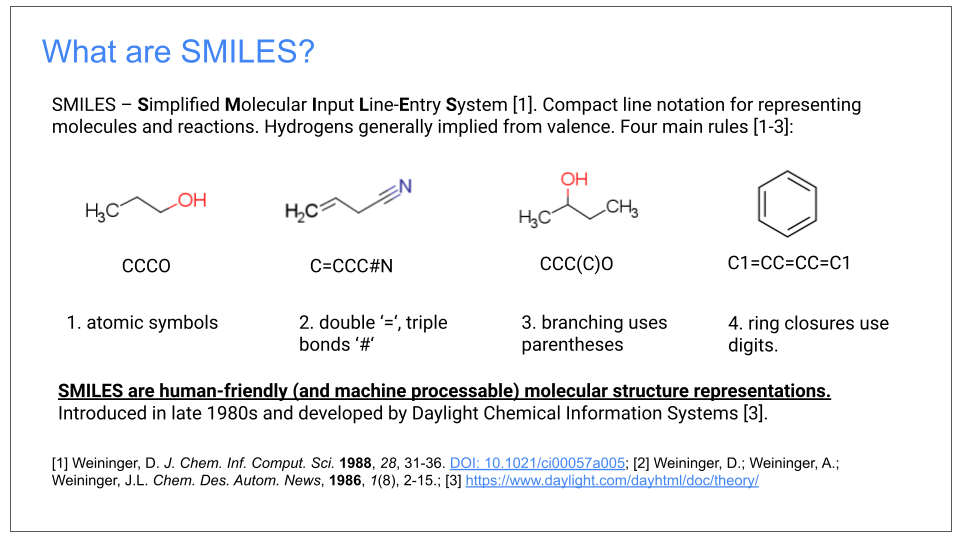

In [2]:
# Load slides into Jupyter notebook
from IPython.display import Image
Image(filename='../X_Slides/SMILES_Syntax_01.png')

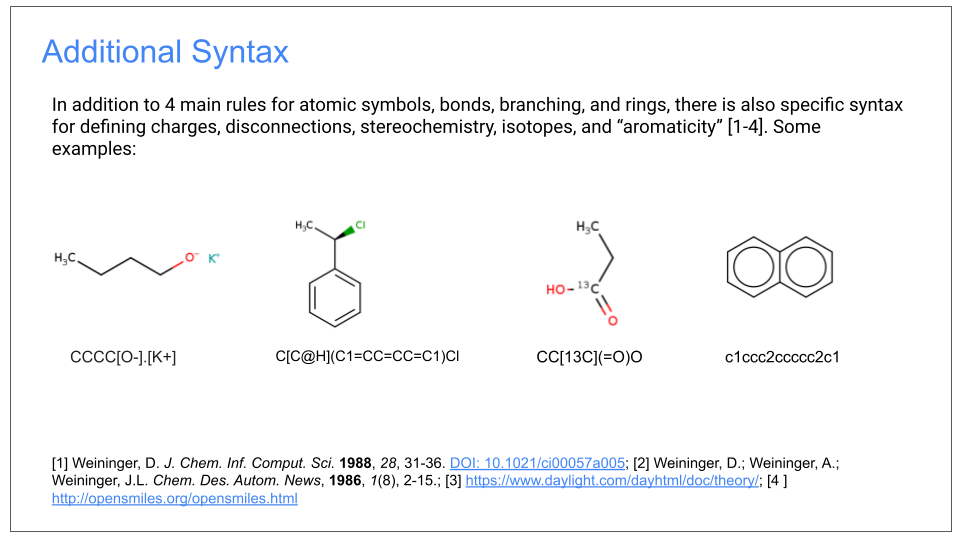

In [3]:
Image(filename='../X_Slides/SMILES_Syntax_02.png')

## 2. Reading and working with molecules

Chemical representations like SMILES can be parsed with RDKit into molecular objects (mol objects). This is an internal RDKit class which contains the molecule atoms, bonds, indices, and properties (useful for downstream modification and calculations).

By default, RDKit performs a "sanitization" of molecules (https://www.rdkit.org/docs/RDKit_Book.html#molecular-sanitization); this step normalizes and cleans up molecules for downstream processing. You generally don't need to worry about this step, but you should be aware of it in certain edge cases where you might want to adjust the sanitization steps. We will come back to this topic in Part 2.

In [4]:
# 2-Methylimidazole
# PubChem CID: https://pubchem.ncbi.nlm.nih.gov/compound/12749
from rdkit import Chem
mysmiles = 'CC1=NC=CN1'
mol = Chem.MolFromSmiles(mysmiles)
print(mol)

### The Basics

We can work with mol objects directly. Here are some examples below, see the molecule class for more information: 

https://www.rdkit.org/docs/source/rdkit.Chem.rdchem.html#rdkit.Chem.rdchem.Mol

In [5]:
# Get molecule info
mol.Debug()

Atoms:
	0 6 C chg: 0  deg: 1 exp: 1 imp: 3 hyb: SP3
	1 6 C chg: 0  deg: 3 exp: 4 imp: 0 hyb: SP2 arom?: 1
	2 7 N chg: 0  deg: 2 exp: 3 imp: 0 hyb: SP2 arom?: 1
	3 6 C chg: 0  deg: 2 exp: 3 imp: 1 hyb: SP2 arom?: 1
	4 6 C chg: 0  deg: 2 exp: 3 imp: 1 hyb: SP2 arom?: 1
	5 7 N chg: 0  deg: 2 exp: 3 imp: 0 hyb: SP2 arom?: 1
Bonds:
	0 0->1 order: 1
	1 1->2 order: a conj?: 1 aromatic?: 1
	2 2->3 order: a conj?: 1 aromatic?: 1
	3 3->4 order: a conj?: 1 aromatic?: 1
	4 4->5 order: a conj?: 1 aromatic?: 1
	5 5->1 order: a conj?: 1 aromatic?: 1


In [6]:
# Get numbers of atoms
print(mol.GetNumAtoms())
print(mol.GetNumAtoms(onlyExplicit=False)) # in cheminformatics, H is not usually in graph

6
12


In [7]:
# Get number bonds
print(mol.GetNumBonds())
print(mol.GetNumBonds(onlyHeavy=False))

6
12


We can also return sequences from mol objects, for example, of atoms and bonds:

In [8]:
for atom in mol.GetAtoms():
    print(atom)

print('')

for bond in mol.GetBonds():
    print(bond)

As you can see, these are atom and bond objects; we can do a lot of interesting things with these. Some basic examples below, see the `rdkit.Chem.rdchem module` for more information: https://www.rdkit.org/docs/source/rdkit.Chem.rdchem.html

Specifically, check out the atom and bond classes: `class rdkit.Chem.rdchem.Atom` and `class rdkit.Chem.rdchem.Bond`

In [9]:
# Get atomic symbols and numbers
for atom in mol.GetAtoms():
    print(atom.GetIdx(), atom.GetSymbol(), atom.GetAtomicNum())

0 C 6
1 C 6
2 N 7
3 C 6
4 C 6
5 N 7


In [10]:
# Here are a few more examples
for atom in mol.GetAtoms():
    print(atom.GetIdx(),
          atom.GetSymbol(),
          atom.GetHybridization(),
          atom.GetIsAromatic(),
          atom.GetTotalNumHs(),
          atom.GetTotalValence())

0 C SP3 False 3 4
1 C SP2 True 0 4
2 N SP2 True 0 3
3 C SP2 True 1 4
4 C SP2 True 1 4
5 N SP2 True 1 3


In [11]:
# Now let's look at a few examples with bonds
for bond in mol.GetBonds():
    print(bond.GetIdx(),
          bond.GetBeginAtomIdx(),
          bond.GetEndAtomIdx(),
          bond.GetBondType())

0 0 1 SINGLE
1 1 2 AROMATIC
2 2 3 AROMATIC
3 3 4 AROMATIC
4 4 5 AROMATIC
5 5 1 AROMATIC


### Loading Molecules

There are various ways to work with and load molecules from a SMILES file. See, for example, the SmilesMolSupplier: https://www.rdkit.org/docs/source/rdkit.Chem.rdmolfiles.html#rdkit.Chem.rdmolfiles.SmilesMolSupplier. This is probably the preferred and most memory efficient way as you don't need to create a variable, the mols are only constructed when needed:

In [12]:
with Chem.SmilesMolSupplier('../X_Data/test_smiles.smi',titleLine=False, delimiter='\t',nameColumn=1) as suppl:
    for mol in suppl:
        if mol is not None: # good practice
            print(mol.GetNumAtoms(), mol.GetProp('_Name'))

31 146758
27 10089772
23 10017963
27 10247811
29 10091548
22 148756


In [13]:
# you can also save a list of mols
mols = []
with Chem.SmilesMolSupplier('../X_Data/test_smiles.smi',titleLine=False, delimiter='\t',nameColumn=1) as suppl:
    for mol in suppl:
        if mol is not None:
           mols.append(mol)
mols

In [14]:
# For small to medium sized datasets (thousands)
# I often will not use the Supplier and just load the SMILES into a list or dictionary, and that works okay too.

# list
import csv
smiles_list = []
with open('../X_Data/test_smiles.smi', newline='') as infile:
    reader = csv.reader(infile, delimiter='\t')
    for idx, row in enumerate(reader):
        smiles_list.append([idx] + row)

smiles_list

[[0,
  'C1=CC=C2C(=C1)C(=CN2)C[C@H]3C(=O)NC4=CC=CC=C4C5=NC6=CC=CC=C6C(=O)N35',
  '146758'],
 [1,
  'C[C@H]1C2=NC3=CC=CC=C3C(=O)N2[C@@H](C(=O)N1)CC4=CNC5=CC=CC=C54',
  '10089772'],
 [2, 'C1=CC=C2C(=C1)C(=CN2)C[C@H]3C(=O)NC4=CC=CC=C4C(=O)N3', '10017963'],
 [3,
  'C[C@@H]1C2=NC3=CC=CC=C3C(=O)N2[C@@H](C(=O)N1)CC4=CNC5=CC=CC=C54',
  '10247811'],
 [4,
  'CC(C)[C@H]1C2=NC3=CC=CC=C3C(=O)N2[C@@H](C(=O)N1)CC4=CNC5=CC=CC=C54',
  '10091548'],
 [5, 'C1=CC=C2C(=C1)C3=C(N2)C4=NC5=CC=CC=C5C(=O)N4C=C3', '148756']]

In [15]:
# or a dictionary
smiles_dict = {}
col_names = ['smiles', 'CID']
with open('../X_Data/test_smiles.smi', 'r') as infile:
    reader = csv.DictReader(infile, delimiter='\t', fieldnames=col_names)
    
    for idx, row in enumerate(reader):
        smiles_dict[idx] = row

smiles_dict

{0: {'smiles': 'C1=CC=C2C(=C1)C(=CN2)C[C@H]3C(=O)NC4=CC=CC=C4C5=NC6=CC=CC=C6C(=O)N35',
  'CID': '146758'},
 1: {'smiles': 'C[C@H]1C2=NC3=CC=CC=C3C(=O)N2[C@@H](C(=O)N1)CC4=CNC5=CC=CC=C54',
  'CID': '10089772'},
 2: {'smiles': 'C1=CC=C2C(=C1)C(=CN2)C[C@H]3C(=O)NC4=CC=CC=C4C(=O)N3',
  'CID': '10017963'},
 3: {'smiles': 'C[C@@H]1C2=NC3=CC=CC=C3C(=O)N2[C@@H](C(=O)N1)CC4=CNC5=CC=CC=C54',
  'CID': '10247811'},
 4: {'smiles': 'CC(C)[C@H]1C2=NC3=CC=CC=C3C(=O)N2[C@@H](C(=O)N1)CC4=CNC5=CC=CC=C54',
  'CID': '10091548'},
 5: {'smiles': 'C1=CC=C2C(=C1)C3=C(N2)C4=NC5=CC=CC=C5C(=O)N4C=C3',
  'CID': '148756'}}

In [16]:
# alternatively, make the IDs the keys, assuming they are unique (!)
smiles_dict = {}
col_names = ['smiles', 'CID']
with open('../X_Data/test_smiles.smi', 'r') as infile:
    reader = csv.DictReader(infile, delimiter='\t', fieldnames=col_names)
    
    for row in reader:
        cid = row['CID']
        smiles_dict[cid] = row['smiles']

smiles_dict

{'146758': 'C1=CC=C2C(=C1)C(=CN2)C[C@H]3C(=O)NC4=CC=CC=C4C5=NC6=CC=CC=C6C(=O)N35',
 '10089772': 'C[C@H]1C2=NC3=CC=CC=C3C(=O)N2[C@@H](C(=O)N1)CC4=CNC5=CC=CC=C54',
 '10017963': 'C1=CC=C2C(=C1)C(=CN2)C[C@H]3C(=O)NC4=CC=CC=C4C(=O)N3',
 '10247811': 'C[C@@H]1C2=NC3=CC=CC=C3C(=O)N2[C@@H](C(=O)N1)CC4=CNC5=CC=CC=C54',
 '10091548': 'CC(C)[C@H]1C2=NC3=CC=CC=C3C(=O)N2[C@@H](C(=O)N1)CC4=CNC5=CC=CC=C54',
 '148756': 'C1=CC=C2C(=C1)C3=C(N2)C4=NC5=CC=CC=C5C(=O)N4C=C3'}

In [17]:
# You can then work with the smiles as standard python variables with RDKit like this:
for key,value in smiles_dict.items():
    mol = Chem.MolFromSmiles(value)
    if mol is not None:
       print(mol.GetNumAtoms(), key)

31 146758
27 10089772
23 10017963
27 10247811
29 10091548
22 148756


## 3. Molecule Depiction

### Basic Depiction

If you just need a quick visualization of the molecule and you are working in a Jupyter Notebook, RDKit can directly display an image as the output, like this:

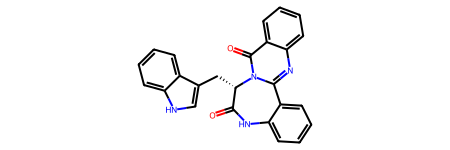

In [18]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

# PubChem CID: 146758
mol = Chem.MolFromSmiles('C1=CC=C2C(=C1)C(=CN2)C[C@H]3C(=O)NC4=CC=CC=C4C5=NC6=CC=CC=C6C(=O)N35')
mol

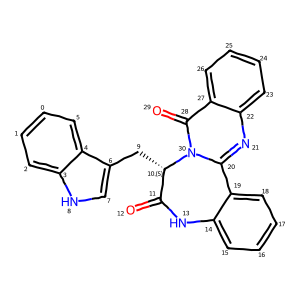

In [19]:
# There are then some options we can control with the IPythonConsole
# See >>> help(IPythonConsole)

# some examples
IPythonConsole.molSize = 300,300
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.drawOptions.addStereoAnnotation = True
IPythonConsole.drawOptions.comicMode = True
IPythonConsole.useSVG = True  # instead of PNG

mol

In [20]:
# Toggle these back to default
IPythonConsole.molSize = 250,250
IPythonConsole.drawOptions.addAtomIndices = False
IPythonConsole.drawOptions.addStereoAnnotation = False
IPythonConsole.drawOptions.comicMode = False
IPythonConsole.useSVG = False

### Depiction with rdMolDraw2D



RDKit has several different methods available to generate 2D coordinates and draw molecules. 

My preferred method is to use the Schroedinger Coordgen library to generate the 2D coordinates
and the `rdMolDraw2D` library to create the drawings:

Module for depiction (2D coordinates): https://www.rdkit.org/docs/source/rdkit.Chem.rdDepictor.html

Module for drawing: https://www.rdkit.org/docs/source/rdkit.Chem.Draw.rdMolDraw2D.html

So, we will focus on these modules throughout the workshops.

In [21]:
# First set the coordinate generation to Coordgen
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)

In [22]:
# Basic SVG example with RDMolDraw2D
# Adapted from Cookbook: https://www.rdkit.org/docs/Cookbook.html#using-coordgen-library

mol = Chem.MolFromSmiles('C1=CC=C2C(=C1)C(=CN2)C[C@H]3C(=O)NC4=CC=CC=C4C5=NC6=CC=CC=C6C(=O)N35')

from IPython.display import SVG
from rdkit.Chem.Draw import rdMolDraw2D

def draw_mol_svg(mol):
    drawer = rdMolDraw2D.MolDraw2DSVG(300,300)
    drawer.DrawMolecule(mol)
    drawer.FinishDrawing()
    return SVG(drawer.GetDrawingText())

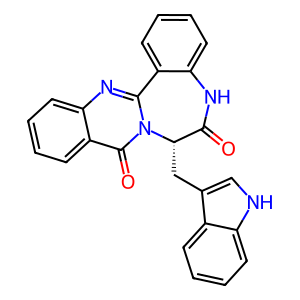

In [23]:
draw_mol_svg(mol)

In [24]:
# PNG alternative

from PIL import Image
import io

# png function to view molecules
def show_png(drawing_text):

    # not sure why, but re-importing PIL
    # each time is necassary in Jupyter
    from PIL import Image
    import io
 
    bio = io.BytesIO(drawing_text)
    img = Image.open(bio)
    return img

def draw_mol_png(mol):
    drawer = rdMolDraw2D.MolDraw2DCairo(300,300)
    drawer.DrawMolecule(mol)
    drawer.FinishDrawing()
    return drawer.GetDrawingText()

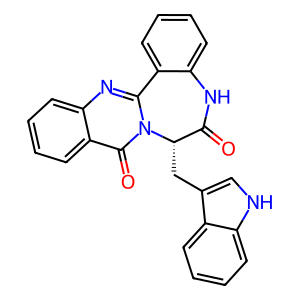

In [25]:
show_png(draw_mol_png(mol))

In [26]:
# OK, now let's look at adding some options:

def draw_mol_annotated(mol):
    drawer = rdMolDraw2D.MolDraw2DSVG(300,300)
    drawer.drawOptions().addAtomIndices = True
    drawer.drawOptions().addStereoAnnotation = True
    drawer.DrawMolecule(mol)
    drawer.FinishDrawing()
    return SVG(drawer.GetDrawingText())

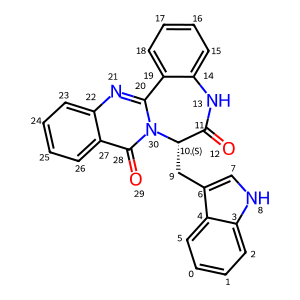

In [27]:
draw_mol_annotated(mol)

In [28]:
# dark mode
def draw_mol_dark(mol):
    drawer = rdMolDraw2D.MolDraw2DCairo(300,300)
    drawer.drawOptions().clearBackground = False
    rdMolDraw2D.SetDarkMode(drawer)
    drawer.DrawMolecule(mol)
    drawer.FinishDrawing()
    return drawer.GetDrawingText()

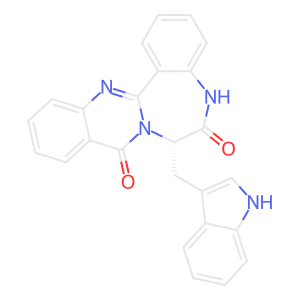

In [29]:
show_png(draw_mol_dark(mol))

In [30]:
# Neon mode!
def draw_mol_neon(mol):
    drawer = rdMolDraw2D.MolDraw2DCairo(300,300)
    drawer.drawOptions().clearBackground = False
    rdMolDraw2D.SetDarkMode(drawer)
    drawer.drawOptions().updateAtomPalette({6:(.22,1,.08)})  # make carbon neon green
    drawer.DrawMolecule(mol)
    drawer.FinishDrawing()
    return drawer.GetDrawingText()

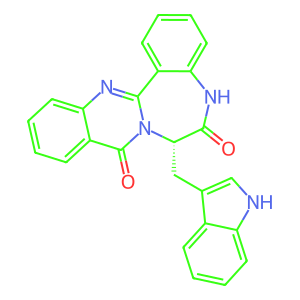

In [31]:
show_png(draw_mol_neon(mol))

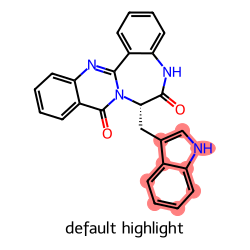

In [32]:
# Highlighting
# For now, we will highlight atoms 0-8
# A bit later, we will look at highlighting specific substructures

drawer = rdMolDraw2D.MolDraw2DCairo(250,250)
drawer.DrawMolecule(mol, highlightAtoms=range(0,9), legend='default highlight')
drawer.FinishDrawing()
show_png(drawer.GetDrawingText())

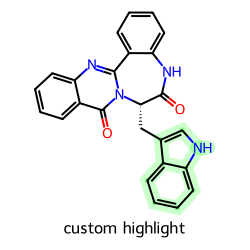

In [33]:
# some highlight options
rgba_color = (0.0, 1.0, 0, 0.2) # transparent green
drawer = rdMolDraw2D.MolDraw2DCairo(250,250)
drawer.drawOptions().fillHighlights=True
drawer.drawOptions().setHighlightColour((rgba_color))
drawer.drawOptions().highlightRadius = 0.1
drawer.drawOptions().highlightBondWidthMultiplier=15
drawer.DrawMolecule(mol, highlightAtoms=range(0,9), legend='custom highlight')
drawer.FinishDrawing()
show_png(drawer.GetDrawingText())

### Grid Depiction

Finally, it's often useful to be able to plot a series of molecule depictions in a grid. Here is one way to do that:

Adapted from: https://gist.github.com/greglandrum/431483ac1f9edb03b09c8577031c10e0 and https://github.com/vfscalfani/rdkit_draw2DG

In [34]:
mols = []
with Chem.SmilesMolSupplier('../X_Data/test_smiles.smi',titleLine=False, delimiter='\t',nameColumn=1) as suppl:
    for mol in suppl:
        if mol is not None:
            mols.append([mol, mol.GetProp('_Name')])
mols

[[<rdkit.Chem.rdchem.Mol at 0x7c9972132ff0>, '146758'],
 [<rdkit.Chem.rdchem.Mol at 0x7c9972b1b1b0>, '10089772'],
 [<rdkit.Chem.rdchem.Mol at 0x7c9972131a10>, '10017963'],
 [<rdkit.Chem.rdchem.Mol at 0x7c9972131b60>, '10247811'],
 [<rdkit.Chem.rdchem.Mol at 0x7c9972131bd0>, '10091548'],
 [<rdkit.Chem.rdchem.Mol at 0x7c9972131a80>, '148756']]

In [35]:
# This is a useful function to setup the grid drawing space
# We will use this several times, so it's useful to define

def setup_grid(mols, num_molsPerRow=3, panel_size=250):
    molsPerRow = num_molsPerRow
    nRows = len(mols)//molsPerRow
    if len(mols)%molsPerRow:
       nRows+=1
    panelx = panel_size
    panely = panel_size
    canvasx = panelx * molsPerRow
    canvasy = panely * nRows
    drawer_grid = rdMolDraw2D.MolDraw2DCairo(canvasx,canvasy,panelx,panely)
    return drawer_grid

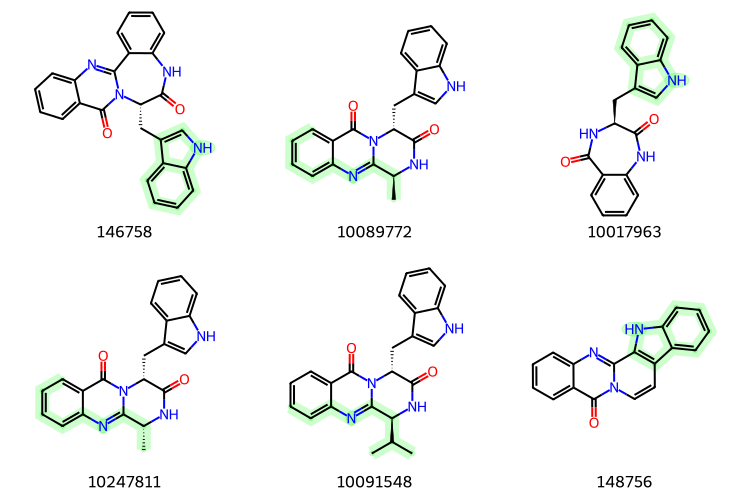

In [36]:
# index mols and names into lists
mols_to_draw = [mol[0] for mol in mols]
names = [mol[1] for mol in mols]

# setup the grid canvas
drawer = setup_grid(mols_to_draw, num_molsPerRow=3, panel_size=250)

# Add highlight options
rgba_color = (0.0, 1.0, 0, 0.2) # transparent green
drawer.drawOptions().fillHighlights=True
drawer.drawOptions().setHighlightColour((rgba_color))
drawer.drawOptions().highlightRadius = 0.1
drawer.drawOptions().highlightBondWidthMultiplier=15

# Note we are just highlighting first 8 atoms as a demo, it's not a substructure match or anything
# We will do substructure matches later...
drawer.DrawMolecules(mols_to_draw, legends=names,highlightAtoms=[list(range(0, 9)) for index in range(len(mols))])
drawer.FinishDrawing()
show_png(drawer.GetDrawingText())

Check out this RDKit blog post for more explanation of drawing options: https://greglandrum.github.io/rdkit-blog/posts/2023-05-26-drawing-options-explained.html

# 4. Canonicalization, identifiers, and hashes

Canonicalization is a process that creates a unique and reproducible representation of a molecule (Engel and Gasteiger, Chemoinformatics Basic Concepts and Methods, pp 76-79). Canonicilzation is an important technique in cheminformatics and is used for identifying duplicates and registering molecules into databases. In addition to the Engel and Gasteiger text mentioned above, see the following references for more information:

* Morgan, H. Generation of a Unique Machine Description for Chemical Structures - A Technique Developed at Chemical Abstracts Service. *Journal of Chemical Documentation* **1965**, *5*, 107. https://doi.org/10.1021/c160017a018.

* Weininger, D.; Weininger, A.; Weininger, J. L. SMILES 2: Algorithm for Generation of Unique SMILES Notation. *Journal of Chemical Information and Computer Sciences* **1989**, *29*, 97. https://doi.org/10.1021/ci00062a008.

* Schneider, N.; Sayle, R. A.; Landrum, G. A. Get Your Atoms in Order-An Open-Source Implementation of a Novel and Robust Molecular Canonicalization Algorithm. *Journal of Chemical Information and Modeling* **2015**, *55*, 2111. https://doi.org/10.1021/acs.jcim.5b00543.


### Canonicalization

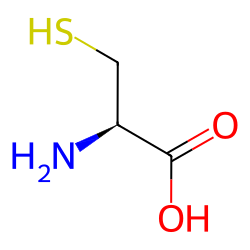

In [37]:
# Let's look at an example
# Valid SMILES can be written many different ways for the "same" molecule

from rdkit.Chem.Draw import IPythonConsole

# Cysteine
mol1 = Chem.MolFromSmiles('SC[C@@H](C(O)=O)N')
mol1

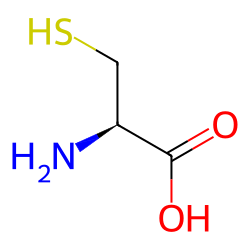

In [38]:
mol2 = Chem.MolFromSmiles('O=C([C@@H](N)CS)O')
mol2

In [39]:
# RDKit can canonicalize the SMILES and then we can check for equivalency with string comparisons
smi1 = Chem.MolToSmiles(mol1) # Note that canonical=True is default behavior
print(smi1)
smi2 = Chem.MolToSmiles(mol2)
print(smi2)
print("")

# Are they equaivalent?
print(smi1 == smi2)

N[C@@H](CS)C(=O)O
N[C@@H](CS)C(=O)O

True


In [40]:
# Note that RDKit has a built in function to generate random smiles.
mol = Chem.MolFromSmiles('N[C@@H](CS)C(=O)O')
random_smiles = Chem.MolToRandomSmilesVect(mol, 20)
random_smiles

['N[C@@H](CS)C(O)=O',
 '[C@@H](N)(C(=O)O)CS',
 '[C@@H](C(O)=O)(CS)N',
 'C([C@H](CS)N)(=O)O',
 'SC[C@@H](C(=O)O)N',
 'C(=O)([C@@H](N)CS)O',
 'OC(=O)[C@@H](N)CS',
 'C([C@@H](N)CS)(O)=O',
 'OC(=O)[C@H](CS)N',
 'OC([C@H](CS)N)=O',
 '[C@@H](N)(C(=O)O)CS',
 'N[C@@H](CS)C(O)=O',
 'O=C(O)[C@H](CS)N',
 'C([C@@H](N)CS)(O)=O',
 'OC([C@H](CS)N)=O',
 '[C@H](N)(CS)C(O)=O',
 'N[C@@H](CS)C(O)=O',
 'C(S)[C@H](N)C(=O)O',
 'C([C@H](CS)N)(O)=O',
 'N[C@@H](CS)C(O)=O']

In [41]:
# let's check if they all canonicalize to the same!
for smi in random_smiles:
    mol = Chem.MolFromSmiles(smi)
    print(Chem.MolToSmiles(mol))

N[C@@H](CS)C(=O)O
N[C@@H](CS)C(=O)O
N[C@@H](CS)C(=O)O
N[C@@H](CS)C(=O)O
N[C@@H](CS)C(=O)O
N[C@@H](CS)C(=O)O
N[C@@H](CS)C(=O)O
N[C@@H](CS)C(=O)O
N[C@@H](CS)C(=O)O
N[C@@H](CS)C(=O)O
N[C@@H](CS)C(=O)O
N[C@@H](CS)C(=O)O
N[C@@H](CS)C(=O)O
N[C@@H](CS)C(=O)O
N[C@@H](CS)C(=O)O
N[C@@H](CS)C(=O)O
N[C@@H](CS)C(=O)O
N[C@@H](CS)C(=O)O
N[C@@H](CS)C(=O)O
N[C@@H](CS)C(=O)O


An important note about canonical SMILES is that they are toolkit specific, so you can't compare canonical SMILES across different software. For comparing chemical identidy across software toolkits, we would want to use a canonical identifier like the IUPAC InChI:

### InChI

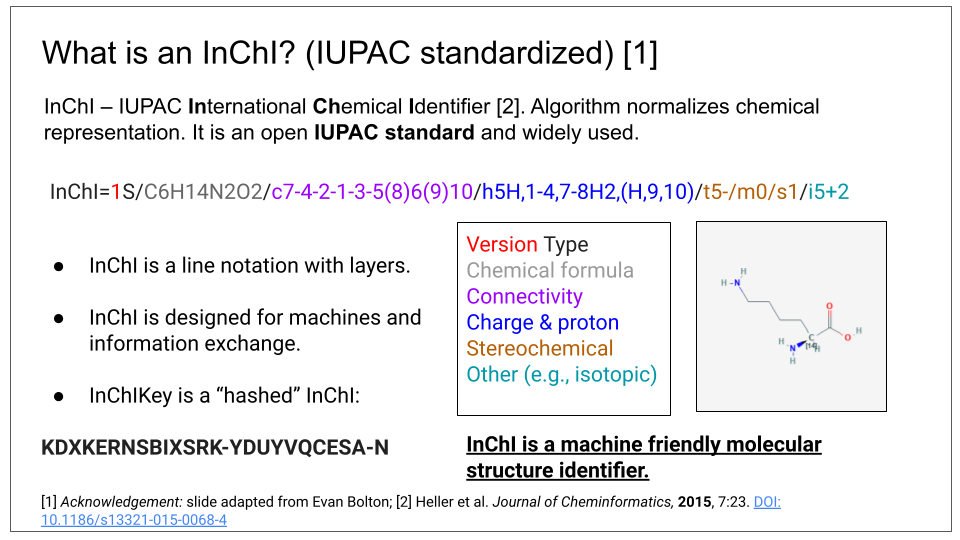

In [42]:
from IPython.display import Image
Image(filename='../X_Slides/InChI_01.png')

In [43]:
# Let's repeat our cysteine example, now with InChI
mol1 = Chem.MolFromSmiles('SC[C@@H](C(O)=O)N')
mol2 = Chem.MolFromSmiles('O=C([C@@H](N)CS)O')

inchi1 = Chem.MolToInchi(mol1) # Note that canonical=True is default behavior
print(inchi1)
inchi2 = Chem.MolToInchi(mol2)
print(inchi2)
print("")

# Are they equaivalent?
print(inchi1 == inchi2)

InChI=1S/C3H7NO2S/c4-2(1-7)3(5)6/h2,7H,1,4H2,(H,5,6)/t2-/m0/s1
InChI=1S/C3H7NO2S/c4-2(1-7)3(5)6/h2,7H,1,4H2,(H,5,6)/t2-/m0/s1

True


Since normalization (e.g., of tautomers) is part of the InChI calculation, it's useful for identifying variations of molecules, but not designed to reproduce the original structure.

Let's look at an example tautomer from Dhaked, D. K. et al.J. Chem. Inf. Model. 2020, 60 (3), 1253–1275. https://doi.org/10.1021/acs.jcim.9b01080.

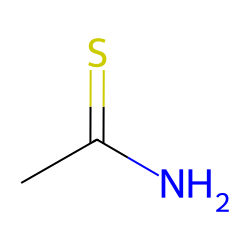

In [44]:
# 1,3 heteroatom H-shift
mol1 = Chem.MolFromSmiles('CC(N)=S')
mol1

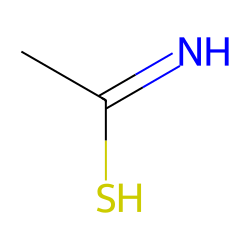

In [45]:
mol2 = Chem.MolFromSmiles('[H]SC(C)=N[H]')
mol2

In [46]:
# If we generate canonical SMILES, the tautomers are preserved and not considered equivalent
smi1_can = Chem.MolToSmiles(mol1)
print(smi1_can)
smi2_can = Chem.MolToSmiles(mol2)
print(smi2_can)

CC(N)=S
CC(=N)S


In [47]:
# Let's see what happens with InChI
inchi1 = Chem.MolToInchi(mol1)
print(inchi1)
inchi2 = Chem.MolToInchi(mol2)
print(inchi2)

InChI=1S/C2H5NS/c1-2(3)4/h1H3,(H2,3,4)
InChI=1S/C2H5NS/c1-2(3)4/h1H3,(H2,3,4)


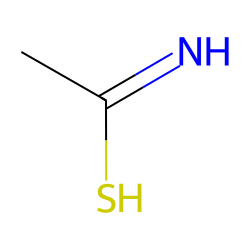

In [48]:
# Only a single tautomer, so we can't reproduce both original structures using the standard InChI:
Chem.MolFromInchi('InChI=1S/C2H5NS/c1-2(3)4/h1H3,(H2,3,4)') # it is not recommneded to construct a mol from InChI

### MolHash

RDKit includes a module developed by NextMove Software for computing some other interesting canonical molecular hashes:

* https://www.nextmovesoftware.com/talks/OBoyle_MolHash_ACS_201908.pdf

* https://www.rdkit.org/docs/source/rdkit.Chem.rdMolHash.html#module-rdkit.Chem.rdMolHash

In [49]:
from rdkit.Chem import rdMolHash

# Get types of molhashes
molhash_names = rdMolHash.HashFunction.names
molhash_names

{'AnonymousGraph': rdkit.Chem.rdMolHash.HashFunction.AnonymousGraph,
 'ElementGraph': rdkit.Chem.rdMolHash.HashFunction.ElementGraph,
 'CanonicalSmiles': rdkit.Chem.rdMolHash.HashFunction.CanonicalSmiles,
 'MurckoScaffold': rdkit.Chem.rdMolHash.HashFunction.MurckoScaffold,
 'ExtendedMurcko': rdkit.Chem.rdMolHash.HashFunction.ExtendedMurcko,
 'MolFormula': rdkit.Chem.rdMolHash.HashFunction.MolFormula,
 'AtomBondCounts': rdkit.Chem.rdMolHash.HashFunction.AtomBondCounts,
 'DegreeVector': rdkit.Chem.rdMolHash.HashFunction.DegreeVector,
 'Mesomer': rdkit.Chem.rdMolHash.HashFunction.Mesomer,
 'HetAtomTautomer': rdkit.Chem.rdMolHash.HashFunction.HetAtomTautomer,
 'HetAtomProtomer': rdkit.Chem.rdMolHash.HashFunction.HetAtomProtomer,
 'RedoxPair': rdkit.Chem.rdMolHash.HashFunction.RedoxPair,
 'Regioisomer': rdkit.Chem.rdMolHash.HashFunction.Regioisomer,
 'NetCharge': rdkit.Chem.rdMolHash.HashFunction.NetCharge,
 'SmallWorldIndexBR': rdkit.Chem.rdMolHash.HashFunction.SmallWorldIndexBR,
 'SmallWo

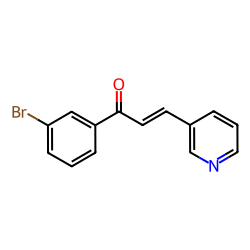

In [50]:
mol = Chem.MolFromSmiles('BrC1=CC=CC(=C1)C(=O)C=CC1=CN=CC=C1')
mol

In [51]:
# We can compute all hashes like this:
hashes = {}
for key, value in molhash_names.items():
    hashes[key] = rdMolHash.MolHash(mol, value)
hashes

{'AnonymousGraph': '**1****(*(*)***2*****2)*1',
 'ElementGraph': 'OC(CCC1CCCNC1)C1CCCC(Br)C1',
 'CanonicalSmiles': 'O=C(C=Cc1cccnc1)c1cccc(Br)c1',
 'MurckoScaffold': 'C(=Cc1cccnc1)Cc1ccccc1',
 'ExtendedMurcko': '*c1cccc(C(=*)C=Cc2cccnc2)c1',
 'MolFormula': 'C14H10BrNO',
 'AtomBondCounts': '17,18',
 'DegreeVector': '0,4,11,2',
 'Mesomer': '[O][C]([CH][CH][C]1[CH][CH][CH][N][CH]1)[C]1[CH][CH][CH][C](Br)[CH]1_0',
 'HetAtomTautomer': '[O][C]([CH][CH][C]1[CH][CH][CH][N][CH]1)[C]1[CH][CH][CH][C](Br)[CH]1_0_0',
 'HetAtomProtomer': '[O][C]([CH][CH][C]1[CH][CH][CH][N][CH]1)[C]1[CH][CH][CH][C](Br)[CH]1_0',
 'RedoxPair': '[O][C]([CH][CH][C]1[CH][CH][CH][N][CH]1)[C]1[CH][CH][CH][C](Br)[CH]1',
 'Regioisomer': '*Br.*C=CC(*)=O.c1ccccc1.c1ccncc1',
 'NetCharge': '0',
 'SmallWorldIndexBR': 'B18R2',
 'SmallWorldIndexBRL': 'B18R2L11',
 'ArthorSubstructureOrder': '0011001201000e0003000086000000',
 'HetAtomTautomerv2': '[O]:[C](:[C]:[C]:[C]1:[C]:[C]:[C]:[N]:[C]:1):[C]1:[C]:[C]:[C]:[C](-[Br]):[C]:1_10_0',
 '

In [52]:
hashes["AnonymousGraph"]

'**1****(*(*)***2*****2)*1'

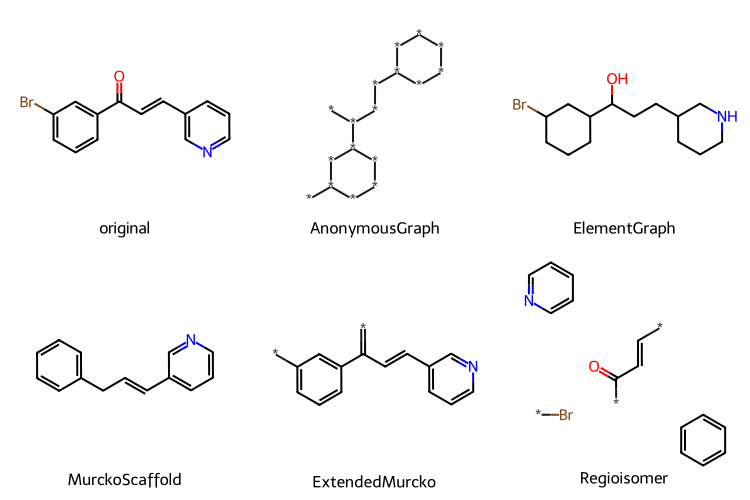

In [53]:
# Let's look at some of the hashes visually
# mols and names into lists

smiles = ['BrC1=CC=CC(=C1)C(=O)C=CC1=CN=CC=C1',
          hashes["AnonymousGraph"],
          hashes["ElementGraph"],
          hashes["MurckoScaffold"],
          hashes["ExtendedMurcko"],
          hashes["Regioisomer"]]

mols_to_draw = []
for smi in smiles:
    mols_to_draw.append(Chem.MolFromSmiles(smi))

# setup the grid canvas
drawer = setup_grid(mols_to_draw, num_molsPerRow=3, panel_size=250)

names = ['original', 'AnonymousGraph', 'ElementGraph', 'MurckoScaffold', 'ExtendedMurcko', 'Regioisomer']

drawer.DrawMolecules(mols_to_draw, legends=names)
drawer.FinishDrawing()
drawer.GetDrawingText()
show_png(drawer.GetDrawingText())

Here is one use-case with the AnonymousGraph hash; see the NextMove slides referenced above for more examples.

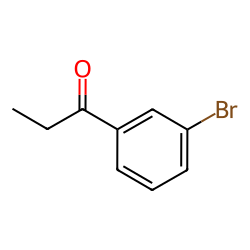

In [54]:
# With Anonymous graph, we can identify molecules with the same skeletal structure like this:
target_smiles = 'CCC(=O)C1=CC(Br)=CC=C1'
mol = Chem.MolFromSmiles(target_smiles)
mol

In [55]:
target_anon_graph = rdMolHash.MolHash(mol, Chem.rdMolHash.HashFunction.AnonymousGraph)
target_anon_graph

'***(*)*1****(*)*1'

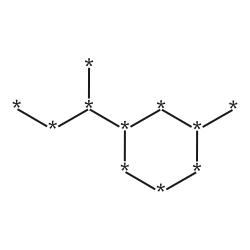

In [56]:
anon_mol = Chem.MolFromSmiles(target_anon_graph)
anon_mol

Anonymous Graph match to Target structure 0:


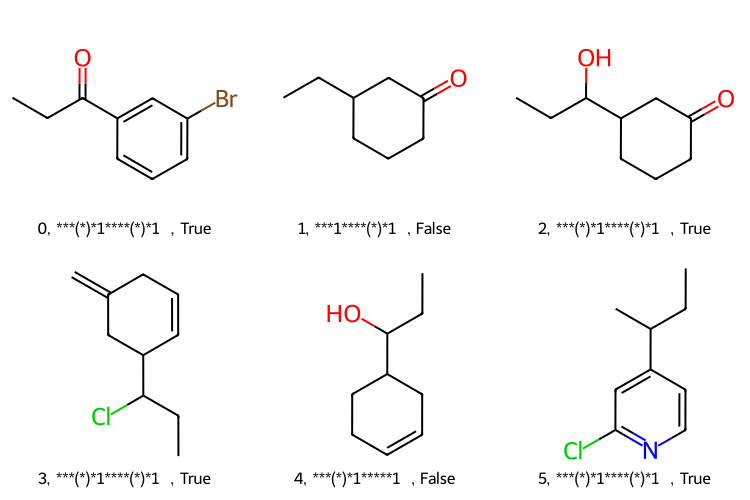

In [57]:
smiles_dataset = ['CCC(=O)C1=CC(Br)=CC=C1',
                  'CCC1CCCC(=O)C1',
                  'CCC(O)C1CCCC(=O)C1',
                  'CCC(Cl)C1CC(=C)CC=C1',
                  'CCC(O)C1CCC=CC1',
                  'CCC(C)C1=CC(Cl)=NC=C1']

mols = []
for smi in smiles_dataset:
    mols.append(Chem.MolFromSmiles(smi))

# setup the grid canvas
drawer = setup_grid(mols_to_draw, num_molsPerRow=3, panel_size=250)

# Compute anonymous graphs for mols
anon_graphs = []
for mol in mols:
    anon_graphs.append(rdMolHash.MolHash(mol, Chem.rdMolHash.HashFunction.AnonymousGraph))
anon_graphs

# Which mols have same anononymous graph as target_anon_graph
anon_graphs_label = []
for idx, anon_graph in enumerate(anon_graphs):
    if target_anon_graph == anon_graph:
        anon_graphs_label.append(str(idx) + ", " + anon_graph + "  , True")
    else:
        anon_graphs_label.append(str(idx) + ", " + anon_graph + "  , False")


drawer.DrawMolecules(mols, legends=anon_graphs_label)
drawer.FinishDrawing()

print("Anonymous Graph match to Target structure 0:")
show_png(drawer.GetDrawingText())

## 5. Chemical similarity and fingerprints

Chemical similarity is a core concept in cheminformatics, and it's one of the main search strategies available in chemical databases. The idea is that "structurally similar molecules tend to have similar properties" (Leach, A.R. and Gillet, V. J., An Introduction to Chemoinformatics, 2nd ed, pp 99).

Since defining what similairy means between two molecules is subjective, there are many different techniques available. A great introductions to similarity searching is in Chapter 5 of the aformentioned text:

* Leach, A.R. and Gillet, V. J., An Introduction to Chemoinformatics, 2nd ed, Chapter 5

In addition to the introduction mentioned above, if you are looking for more code tutorials, the following two resources are recommended:

* OLCC Cheminfomratics Course: https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics/06%3A_Molecular_Similarity
* TeachOpenCADD: https://projects.volkamerlab.org/teachopencadd/talktorials/T004_compound_similarity.html

There are two steps to computing molecular similarity. The first is to define some type of descriptor to describe feature(s) of the structure. A popular method is to use a fingerprint. A fingerprint is a binary vector that encodes structural features (Leach, A.R. and Gillet, V. J, Ch. 5). Two common fingerprints are structural key based and hashed fingerprints. In structural key based fingerprints, there is a set of predefined substructures or features. If the structure contains the feature, the bit is set to 1. In hashed fingerprints, there is not a predefined dictionary of features. The substructure or features are determined by an algorithm for each strucure and then hashed (Leach, A.R. and Gillet, V. J, Ch. 1). See also:

https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics/06%3A_Molecular_Similarity/6.01%3A_Molecular_Descriptors


We will look at an example of each in RDKit:

* MACCS Keys, which are a set of known structural keys to produce the binary fingerprint (https://doi.org/10.1021/ci010132r)
* RDKit fingerprint, which is a path based topological hashed fingerprint (https://www.rdkit.org/docs/RDKit_Book.html#rdkit-fingerprints)

The second step of computing molecular similarity is to then qauntify the degree of similarity using a similairty coefficient. A popular one in cheminformatics is the Tanimoto coefficient to compare the binary vectors, but there are many others (Leach, A.R. and Gillet, V. J, Ch. 5).


eq. 5.1, Leach, A.R. and Gillet, V. J, Ch. 5:

```
Tanimoto_Similarity(XY) = c / (a + b - c)         

c: number of common bits in mols X and Y
a: number of on bits in mol X
b: number of on bits in mol Y
```


### MACCS Keys

In [58]:
# Let's look at MACCS Keys
# https://www.rdkit.org/docs/GettingStartedInPython.html#maccs-keys
# https://github.com/rdkit/rdkit/blob/master/rdkit/Chem/MACCSkeys.py

In [59]:
from rdkit.Chem import MACCSkeys

In [ ]:
help(MACCSkeys)

MACCSkeys use a series of SMARTS patterns to define substructures.

SMARTS (SMILES arbitrary target specification) is a query language that allows for the specification of molecular patterns. See the following resources for more information:

* https://www.daylight.com/dayhtml/doc/theory/theory.smarts.html

* https://en.wikipedia.org/wiki/SMILES_arbitrary_target_specification

SMARTS can be tricky to construct, if you are just looking for some examples to test, RDKit has several examples, in addition to the MACCSKeys Patterns:

* https://github.com/rdkit/rdkit/blob/master/rdkit/Chem/MACCSkeys.py

* https://github.com/rdkit/rdkit/blob/master/Regress/Data/RLewis_smarts.txt

A great tool to visualize and test SMARTS patterns is SMARTSview:

* https://smarts.plus/

In [61]:
# Get the list of MACCS Keys SMARTS patterns
patterns = MACCSkeys.smartsPatts
patterns

{1: ('?', 0),
 2: ('[#104]', 0),
 3: ('[#32,#33,#34,#50,#51,#52,#82,#83,#84]', 0),
 4: ('[Ac,Th,Pa,U,Np,Pu,Am,Cm,Bk,Cf,Es,Fm,Md,No,Lr]', 0),
 5: ('[Sc,Ti,Y,Zr,Hf]', 0),
 6: ('[La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu]', 0),
 7: ('[V,Cr,Mn,Nb,Mo,Tc,Ta,W,Re]', 0),
 8: ('[!#6;!#1]1~*~*~*~1', 0),
 9: ('[Fe,Co,Ni,Ru,Rh,Pd,Os,Ir,Pt]', 0),
 10: ('[Be,Mg,Ca,Sr,Ba,Ra]', 0),
 11: ('*1~*~*~*~1', 0),
 12: ('[Cu,Zn,Ag,Cd,Au,Hg]', 0),
 13: ('[#8]~[#7](~[#6])~[#6]', 0),
 14: ('[#16]-[#16]', 0),
 15: ('[#8]~[#6](~[#8])~[#8]', 0),
 16: ('[!#6;!#1]1~*~*~1', 0),
 17: ('[#6]#[#6]', 0),
 18: ('[#5,#13,#31,#49,#81]', 0),
 19: ('*1~*~*~*~*~*~*~1', 0),
 20: ('[#14]', 0),
 21: ('[#6]=[#6](~[!#6;!#1])~[!#6;!#1]', 0),
 22: ('*1~*~*~1', 0),
 23: ('[#7]~[#6](~[#8])~[#8]', 0),
 24: ('[#7]-[#8]', 0),
 25: ('[#7]~[#6](~[#7])~[#7]', 0),
 26: ('[#6]=;@[#6](@*)@*', 0),
 27: ('[I]', 0),
 28: ('[!#6;!#1]~[CH2]~[!#6;!#1]', 0),
 29: ('[#15]', 0),
 30: ('[#6]~[!#6;!#1](~[#6])(~[#6])~*', 0),
 31: ('[!#6;!#1]~[F,Cl,Br,I]',

In [62]:
mol1 = Chem.MolFromSmiles('CCOC(=O)C1=CNC=C1')
fp1 = MACCSkeys.GenMACCSKeys(mol1)
fp1

In [63]:
fp1.ToBitString()

'00000000000000000000000000000000000000000000000000000000000000000100000000000000000100000000000011000000000001000010000001010010000000000100000000000001011101011110110'

In [64]:
#0 is not used..
print(fp1.GetNumBits())
print(fp1.GetNumOnBits())
print(fp1.GetNumOffBits())

167
21
146


In [65]:
# Cool, so what are these 21 "on" bits?
print(list(fp1.GetOnBits()))

[65, 83, 96, 97, 109, 114, 121, 123, 126, 137, 151, 153, 154, 155, 157, 159, 160, 161, 162, 164, 165]


In [66]:
matched_patterns = {}
for key in list(fp1.GetOnBits()):
    if key in patterns:
        matched_patterns[key] = patterns[key]

matched_patterns

{65: ('c:n', 0),
 83: ('[!#6;!#1]1~*~*~*~*~1', 0),
 96: ('*1~*~*~*~*~1', 0),
 97: ('[#7]~*~*~*~[#8]', 0),
 109: ('*~[CH2]~[#8]', 0),
 114: ('[CH3]~[CH2]~*', 0),
 121: ('[#7;R]', 0),
 123: ('[#8]~[#6]~[#8]', 0),
 126: ('*!@[#8]!@*', 0),
 137: ('[!C;!c;R]', 0),
 151: ('[#7;!H0]', 0),
 153: ('[!#6;!#1]~[CH2]~*', 0),
 154: ('[#6]=[#8]', 0),
 155: ('*!@[CH2]!@*', 0),
 157: ('[#6]-[#8]', 0),
 159: ('[#8]', 1),
 160: ('[C;H3,H4]', 0),
 161: ('[#7]', 0),
 162: ('a', 0),
 164: ('[#8]', 0),
 165: ('[R]', 0)}

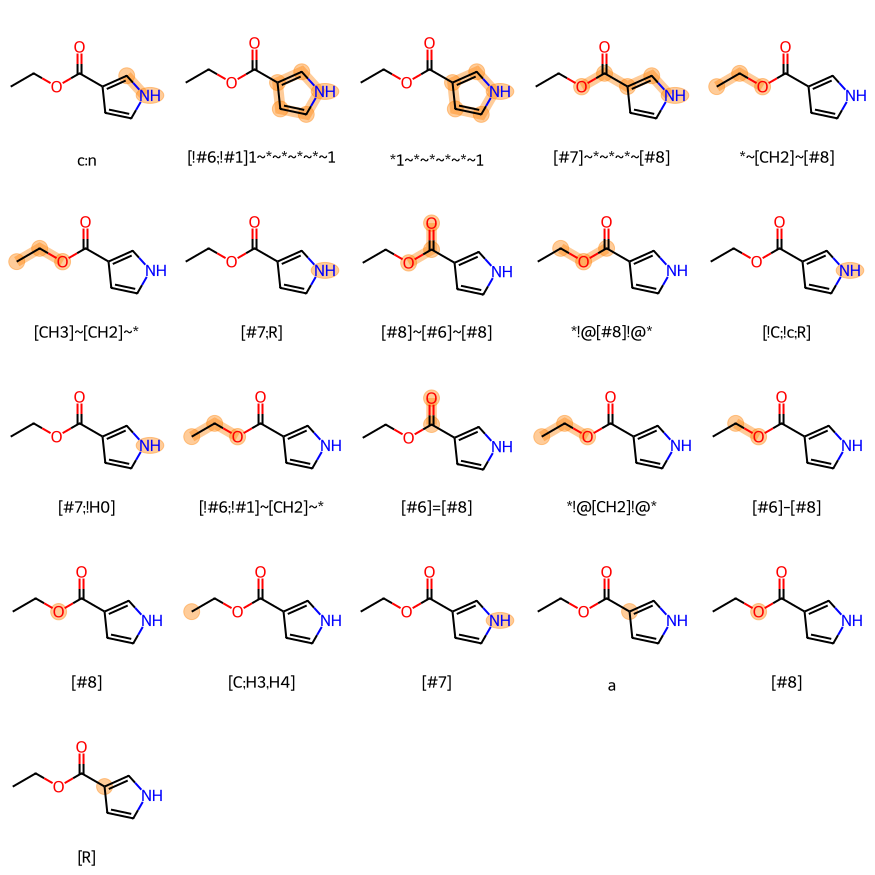

In [67]:
# Visualize the bit matches
# create copies of the mol w/ length of on bits
mols = [mol1 for _ in range(len(list(fp1.GetOnBits())))]

# setup the grid canvas
drawer = setup_grid(mols, num_molsPerRow=5, panel_size=175)

# get the SMARTS strings
smarts_list = []
for smarts in matched_patterns.values():
    smarts_list.append(smarts[0])

# Get atom idx for matches
atom_matches = []
bond_matches = []
for smarts in smarts_list:
    query_mol = Chem.MolFromSmarts(smarts)
    atom_idxs = mol1.GetSubstructMatch(query_mol)
    atom_matches.append(atom_idxs)

    # Get matching bonds
    bond_idxs = []
    for bond in query_mol.GetBonds():
        begin_atom_idx = atom_idxs[bond.GetBeginAtomIdx()]
        end_atom_idx = atom_idxs[bond.GetEndAtomIdx()]
        bond_idxs.append(mol1.GetBondBetweenAtoms(begin_atom_idx,end_atom_idx).GetIdx())   
    bond_matches.append(bond_idxs)

# Add highlight options
rgba_color = (1, 0.5, 0, 0.4) # transparent orange
drawer.drawOptions().fillHighlights=True
drawer.drawOptions().setHighlightColour((rgba_color))
drawer.drawOptions().highlightRadius = 0.3
drawer.drawOptions().highlightBondWidthMultiplier=10

drawer.DrawMolecules(mols, legends=smarts_list,highlightAtoms=atom_matches, highlightBonds=bond_matches)
drawer.FinishDrawing()
show_png(drawer.GetDrawingText())

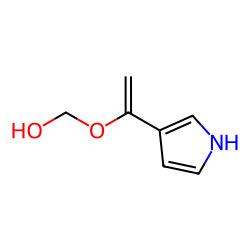

In [68]:
# Compare to another molecule
mol2 = Chem.MolFromSmiles('OCOC(=C)C1=CNC=C1')
mol2

In [69]:
fp2 = MACCSkeys.GenMACCSKeys(mol2)

In [70]:
# We can then compute the Tanimoto Similarity like this
from rdkit import DataStructs

common_bits = len(list((DataStructs.OnBitsInCommon(fp1,fp2))))
tan_sim = common_bits / (fp1.GetNumOnBits() + fp2.GetNumOnBits() - common_bits)
tan_sim

0.6206896551724138

In [71]:
# RDKit actually has a built in function for this too:
tan_sim = DataStructs.TanimotoSimilarity(fp1,fp2)
tan_sim

0.6206896551724138

### RDKit Fingerprint

In [72]:
# Next we will look at the RDKit fingerprint
from rdkit.Chem import AllChem
mol1 = Chem.MolFromSmiles('CCOC(=O)C1=CNC=C1')
mol2 = Chem.MolFromSmiles('OCOC(=C)C1=CNC=C1')
fpgen = AllChem.GetRDKitFPGenerator() # default is max path 7, fpsize=2048
fp1 = fpgen.GetFingerprint(mol1)
fp2 = fpgen.GetFingerprint(mol2)

In [73]:
DataStructs.TanimotoSimilarity(fp1,fp2)

0.37694704049844235

In [74]:
# We can also visualize the RDKit Bits
# Adapted from: https://www.rdkit.org/docs/GettingStartedInPython.html

mol3 = Chem.MolFromSmiles('COC1=CNC=C1')
fpgen = AllChem.GetRDKitFPGenerator(numBitsPerFeature=1, fpSize=1024) # default is max path 7, fpsize=2048
ao = AllChem.AdditionalOutput()
ao.CollectBitPaths() # bit IDs with vectors of bond indices for subgraphs
fp3 = fpgen.GetFingerprint(mol3, additionalOutput=ao)
rdkbits = ao.GetBitPaths() # bits
rdkbits

{3: ((3,), (4,)),
 11: ((2, 3, 4, 5),),
 44: ((0, 1),),
 60: ((0, 1, 6), (0, 1, 2)),
 61: ((0, 1, 6, 5, 2, 3),),
 63: ((0, 1, 6, 5, 4),),
 64: ((2, 3, 4, 6), (3, 4, 5, 6)),
 130: ((1, 6, 5, 4),),
 154: ((1, 2, 3, 4, 5),),
 161: ((3, 4), (2, 6, 5)),
 187: ((1, 6, 5, 4, 2),),
 294: ((2, 6), (5, 6)),
 315: ((0,),),
 335: ((1, 6, 5, 2, 3),),
 347: ((1, 6, 5, 4, 3, 2),),
 349: ((1, 2, 3, 4),),
 354: ((1, 6, 2, 3, 4),),
 376: ((1,),),
 387: ((1, 6, 2, 3),),
 388: ((2, 3, 4, 5, 6),),
 398: ((0, 1, 6, 5, 4, 2),),
 483: ((0, 1, 6, 2),),
 505: ((0, 1, 6, 5),),
 513: ((0, 1, 6, 5, 2),),
 534: ((0, 1, 2, 3, 4, 5),),
 559: ((0, 1, 6, 5, 4, 3, 2),),
 563: ((1, 6, 5),),
 614: ((0, 1, 6, 5, 4, 3),),
 632: ((2, 3, 6), (4, 5, 6)),
 633: ((2, 3), (4, 5)),
 644: ((0, 1, 2, 3),),
 661: ((1, 6, 5, 2),),
 742: ((2, 3, 4), (3, 4, 5)),
 774: ((0, 1, 6, 2, 3, 4),),
 803: ((1, 6, 5, 4, 3),),
 842: ((2,), (5,), (6,)),
 850: ((0, 1, 2, 3, 4),),
 866: ((2, 3, 6, 5), (2, 6, 5, 4)),
 926: ((1, 2, 3),),
 932: ((0, 1, 

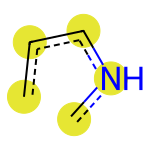

In [75]:
Draw.DrawRDKitBit(mol3, 64, rdkbits, whichExample=1)

In [76]:
# create a list of tuples with mol, bit number, bond indices
tuples_bits = []
for bit in rdkbits:
    tuples_bits.append((mol3, bit, {bit: rdkbits[bit]}))

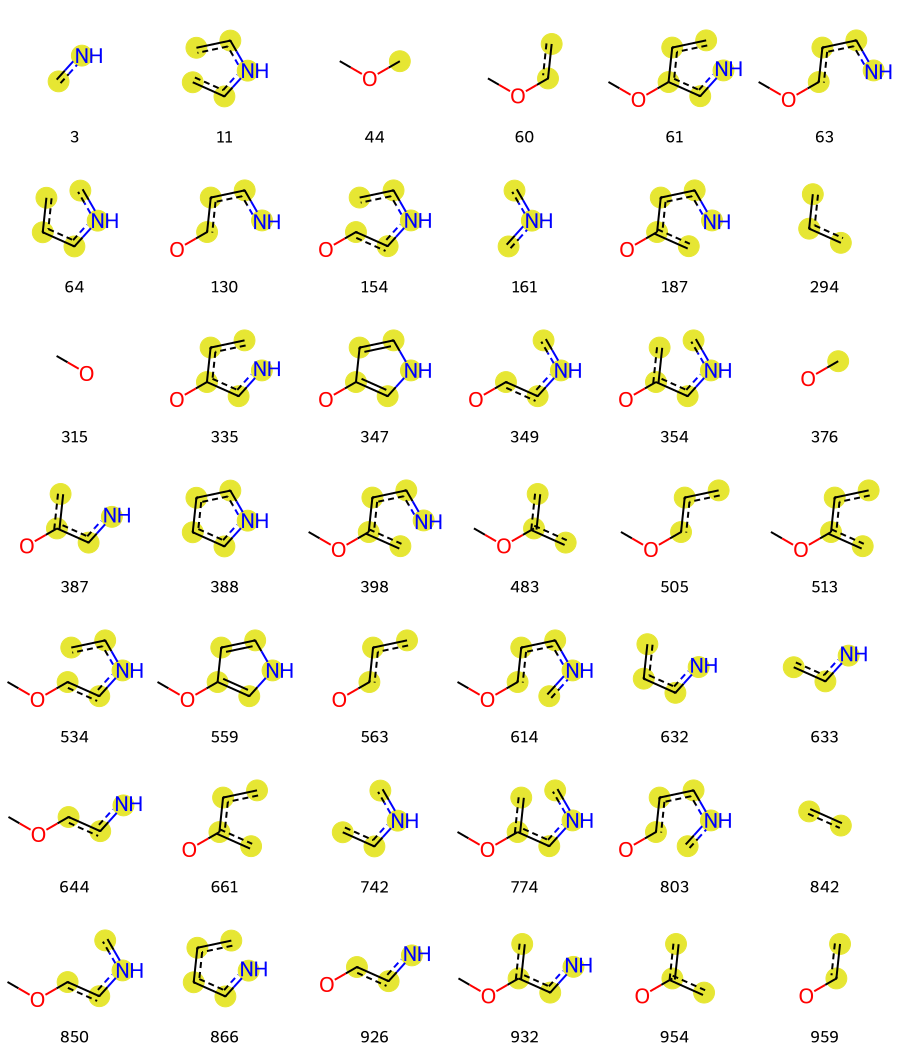

In [77]:
Draw.DrawRDKitBits(tuples_bits, molsPerRow=6,legends=[str(x[1]) for x in tuples_bits])

In [78]:
# Example of computing Similarity for a list of mols
# load SMILES
smiles = ['CCOC(=O)C1=CNC=C1', # our reference/query mol
          'C\\C=C\\C(O)C1=CNC=C1F',
          'CCOC(Cl)C1=CN(C=C1)C(C)C',
          'CCC(C)OC(=O)C1=CNC=C1',
          'CCOC(OC)C1=CN(C)C=C1',
          'CCOC(=O)C1=CNC(C)=C1C']

# compute mols
mols = [Chem.MolFromSmiles(smi) for smi in smiles]
ref_mol = mols[0]

# compute fingerprints and similarity
fpgen = AllChem.GetRDKitFPGenerator() # default is max path 7, fpsize=2048
ref_fp = fpgen.GetFingerprint(ref_mol)

similarities =[ ]
for mol in mols:
    fp = fpgen.GetFingerprint(mol)
    sim_calc = round(DataStructs.TanimotoSimilarity(ref_fp,fp),3)
    similarities.append([mol,sim_calc])


In [79]:
# results
similarities

[[<rdkit.Chem.rdchem.Mol at 0x7c9972157bc0>, 1.0],
 [<rdkit.Chem.rdchem.Mol at 0x7c9972156960>, 0.255],
 [<rdkit.Chem.rdchem.Mol at 0x7c9972156d50>, 0.314],
 [<rdkit.Chem.rdchem.Mol at 0x7c9972156c70>, 0.812],
 [<rdkit.Chem.rdchem.Mol at 0x7c9972156e30>, 0.401],
 [<rdkit.Chem.rdchem.Mol at 0x7c9972156dc0>, 0.525]]

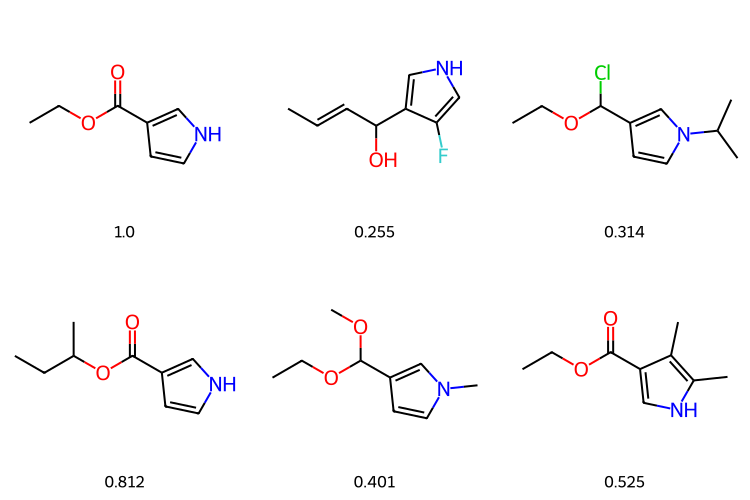

In [80]:
# visualize
mols_to_draw = [item[0] for item in similarities]
sims = [item[1] for item in similarities]

# Convert similarity scores to strings
sims_strings = [str(sim) for sim in sims]

# setup the grid canvas
drawer = setup_grid(mols_to_draw, num_molsPerRow=3, panel_size=250)

drawer.DrawMolecules(mols_to_draw, legends=sims_strings)
drawer.FinishDrawing()
show_png(drawer.GetDrawingText())

## 6. Substructure search

Substructure search allows for the identification of a structure within a structure. Algorithms determine if the chemical graph is contained in another graph (Leach, A.R. and Gillet, V. J., An Introduction to Chemoinformatics, 2nd ed, pp 8). See pages 9-18 for a good introduction to substructure algorithms and search methods.

RDKit has built in algorithms (e.g., `Chem.HasSubstructMatch`) for identifying substructures; we can use SMARTS or SMILES to construct the query. Note, there are ways to define advanced queries and tune parameters, but we won't cover that today, see this if interested: https://greglandrum.github.io/rdkit-blog/posts/2021-08-03-generalized-substructure-search.html

### Basic search

In [81]:
# Load some molecules from earlier:
mols = []
with Chem.SmilesMolSupplier('../X_Data/test_smiles.smi',titleLine=False, delimiter='\t',nameColumn=1) as suppl:
    for mol in suppl:
        if mol is not None:
            mols.append(mol)

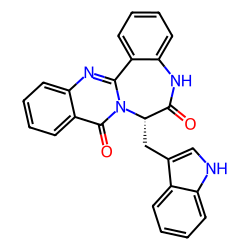

In [82]:
from PIL import Image
import io

mol1 = mols[0]
drawer = rdMolDraw2D.MolDraw2DCairo(250,250)
drawer.DrawMolecule(mol1)
drawer.FinishDrawing()
bio = io.BytesIO(drawer.GetDrawingText())
png = Image.open(bio)
png

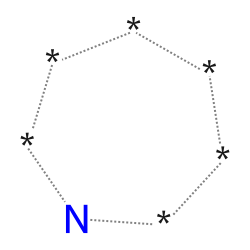

In [83]:
query1 = Chem.MolFromSmarts('[#7]1~*~*~*~*~*~*~1') # nitrogen in 7 membered ring
query1

In [84]:
mol1.HasSubstructMatch(query1)

True

In [85]:
mol1.GetSubstructMatch(query1)

(13, 11, 10, 30, 20, 19, 14)

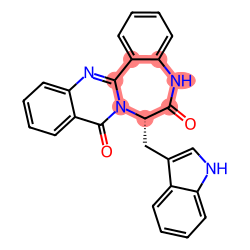

In [86]:
# Highlight the match
# Get atom hits
atom_idxs = mol1.GetSubstructMatch(query1)

# Get bond hits
bond_idxs = []
for bond in query1.GetBonds():
    begin_atom_idx = atom_idxs[bond.GetBeginAtomIdx()]
    end_atom_idx = atom_idxs[bond.GetEndAtomIdx()]
    bond_idxs.append(mol1.GetBondBetweenAtoms(begin_atom_idx, end_atom_idx).GetIdx())

drawer = rdMolDraw2D.MolDraw2DCairo(250,250)
drawer.DrawMolecule(mol1, highlightAtoms=atom_idxs, highlightBonds=bond_idxs)
drawer.FinishDrawing()
show_png(drawer.GetDrawingText())

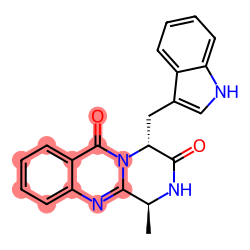

In [87]:
# you can also use SMILES
mol2 = mols[1]
query2 = Chem.MolFromSmiles('C2=NC1=CC=CC=C1C(=O)N2')

# Get atom hits
atom_idxs = mol2.GetSubstructMatch(query2)

# Get bond hits
bond_idxs = []
for bond in query2.GetBonds():
    begin_atom_idx = atom_idxs[bond.GetBeginAtomIdx()]
    end_atom_idx = atom_idxs[bond.GetEndAtomIdx()]
    bond_idxs.append(mol2.GetBondBetweenAtoms(begin_atom_idx, end_atom_idx).GetIdx())

drawer = rdMolDraw2D.MolDraw2DCairo(250,250)
drawer.DrawMolecule(mol2, highlightAtoms=atom_idxs, highlightBonds=bond_idxs)
drawer.FinishDrawing()
show_png(drawer.GetDrawingText())

In [88]:
# Check for matches in a loop with True/False
for mol in mols:
    if mol.HasSubstructMatch(query1):
       print(mol.GetProp('_Name'), 'match found')

146758 match found
10017963 match found


In [89]:
# Return the atom indices
atom_matches = []
for mol in mols:
    if mol.HasSubstructMatch(query1):
        atom_ids = mol.GetSubstructMatch(query1)
        atom_matches.append((mol.GetProp('_Name'),atom_ids))

print(atom_matches)

[('146758', (13, 11, 10, 30, 20, 19, 14)), ('10017963', (13, 11, 10, 22, 20, 19, 14))]


### Highlighting Substructure matches

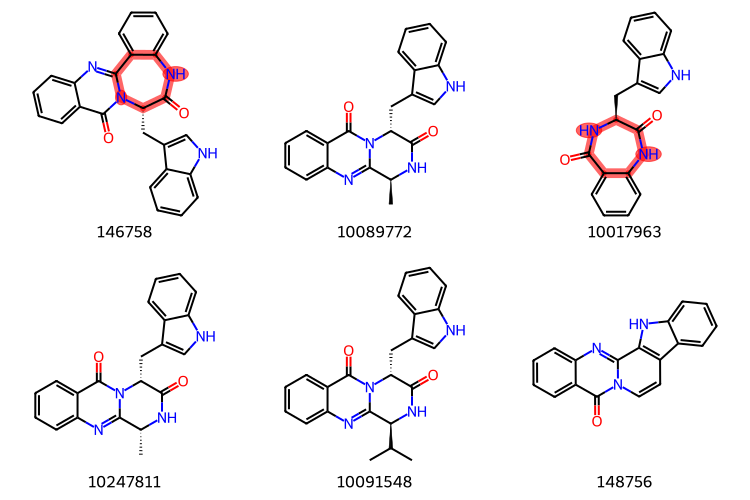

In [90]:
# and now highlight the matches
# Get a list of tuples with mols, mol_ids,
# and atom indices of substructure matches

query1 = Chem.MolFromSmarts('[#7]1~*~*~*~*~*~*~1') # nitrogen in 7 membered ring
mols_search = []
for mol in mols:

    # atom matches
    atom_ids = mol.GetSubstructMatch(query1)
    
    # bond matches
    bond_ids =[]
    if atom_ids:
       for bond in query1.GetBonds():
           begin_idx = atom_ids[bond.GetBeginAtomIdx()]
           end_idx = atom_ids[bond.GetEndAtomIdx()]
           bond_ids.append(mol.GetBondBetweenAtoms(begin_idx, end_idx).GetIdx())
    mols_search.append((mol, mol.GetProp('_Name'), atom_ids, bond_ids))
   
# index out what we need to plot
mols_to_draw = [x[0] for x in mols_search]
labels = [x[1] for x in mols_search]
atom_matches = [x[2] for x in mols_search]
bond_matches = [x[3] for x in mols_search]

# setup the grid canvas
drawer = setup_grid(mols_to_draw, num_molsPerRow=3, panel_size=250)

# Add highlight options
rgba_color = (1.0, 0, 0, 0.6) # transparent red
drawer.drawOptions().fillHighlights=True
drawer.drawOptions().setHighlightColour((rgba_color))
drawer.drawOptions().highlightRadius = 0.1
drawer.drawOptions().highlightBondWidthMultiplier=10

drawer.DrawMolecules(mols_to_draw, legends=labels, highlightAtoms=atom_matches,highlightBonds=bond_matches)
drawer.FinishDrawing()
show_png(drawer.GetDrawingText())

### Maximum Common Substructure

An interesting substructure method is to get the maximum common substructure between mols. MCS can also be used for an alternative similarity metric (Leach, A.R. and Gillet, V. J., An Introduction to Chemoinformatics, 2nd ed, pp 105).

In [91]:
# https://www.rdkit.org/docs/source/rdkit.Chem.rdFMCS.html#module-rdkit.Chem.rdFMCS

from rdkit.Chem import rdFMCS

mol1 = mols[0]
mol2 = mols[1]
res=rdFMCS.FindMCS([mol1,mol2])
print(res.numAtoms) # number atoms in common
print(res.numBonds) # number bonds in common
mcs_query = res.smartsString # Smarts string that describes common query MCS
print(mcs_query) 

27
30
[#6]-,:[#6]-[#6]1:[#7]:[#6]2:[#6]:[#6]:[#6]:[#6]:[#6]:2:[#6](:[#7]:1-[#6](-[#6](=[#8])-[#7])-[#6]-[#6]1:[#6]:[#7]:[#6]2:[#6]:1:[#6]:[#6]:[#6]:[#6]:2)=[#8]


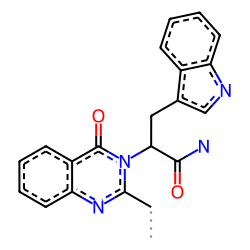

In [92]:
mcs_query_mol = Chem.MolFromSmarts(mcs_query)
mcs_query_mol

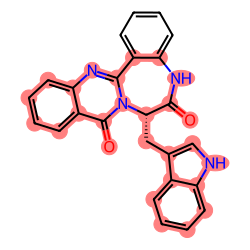

In [93]:

# Get matching atoms
mcs_atoms1 = mol1.GetSubstructMatch(mcs_query_mol)
# Get the matching bonds
mcs_bonds1 = []
for bond in mcs_query_mol.GetBonds():
    begin_atom_idx = mcs_atoms1[bond.GetBeginAtomIdx()]
    end_atom_idx = mcs_atoms1[bond.GetEndAtomIdx()]
    mcs_bonds1.append(mol1.GetBondBetweenAtoms(begin_atom_idx, end_atom_idx).GetIdx())

drawer = rdMolDraw2D.MolDraw2DCairo(250,250)
drawer.drawOptions().addBondIndices = False
drawer.DrawMolecule(mol1, highlightAtoms=mcs_atoms1, highlightBonds=mcs_bonds1)
drawer.FinishDrawing()
show_png(drawer.GetDrawingText())

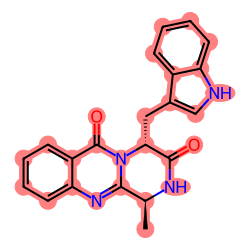

In [94]:
# Get matching atoms
mcs_atoms2 = mol2.GetSubstructMatch(mcs_query_mol)
# Get the matching bonds
mcs_bonds2 = []
for bond in mcs_query_mol.GetBonds():
    begin_atom_idx = mcs_atoms2[bond.GetBeginAtomIdx()]
    end_atom_idx = mcs_atoms2[bond.GetEndAtomIdx()]
    mcs_bonds2.append(mol2.GetBondBetweenAtoms(begin_atom_idx, end_atom_idx).GetIdx())

drawer = rdMolDraw2D.MolDraw2DCairo(250,250)
drawer.DrawMolecule(mol2, highlightAtoms=mcs_atoms2, highlightBonds=mcs_bonds2)
drawer.FinishDrawing()
show_png(drawer.GetDrawingText())

In [95]:
# FindMCS works for more than 2 mols:
res=rdFMCS.FindMCS(mols, timeout=60)  # list of 6 mols
mcs_query = res.smartsString # Smarts string that describes common query MCS
print(mcs_query)

[#6]1:[#6]:[#6]:[#6]2:[#6](:[#6]:1):[#6](:[#6]:[#7]:2)-,:[#6]-,:[#6]-,:[#7]-,:[#6](-,:[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1-,:[#7]-,:[#6])=[#8]


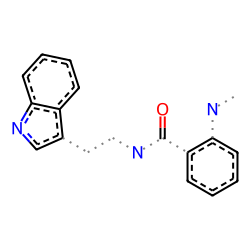

In [96]:
mcs_mol = Chem.MolFromSmarts(mcs_query)
mcs_mol

In [97]:
# Before plotting and highlighting the MCS match, it will be better if we align the structures
# on the common core for easy visualization.
# Adapted from https://www.rdkit.org/docs/GettingStartedInPython.html

# compute coords of MCS
AllChem.Compute2DCoords(mcs_mol)

# apply coords as a reference
for mol in mols:
    AllChem.GenerateDepictionMatching2DStructure(mol,mcs_mol)


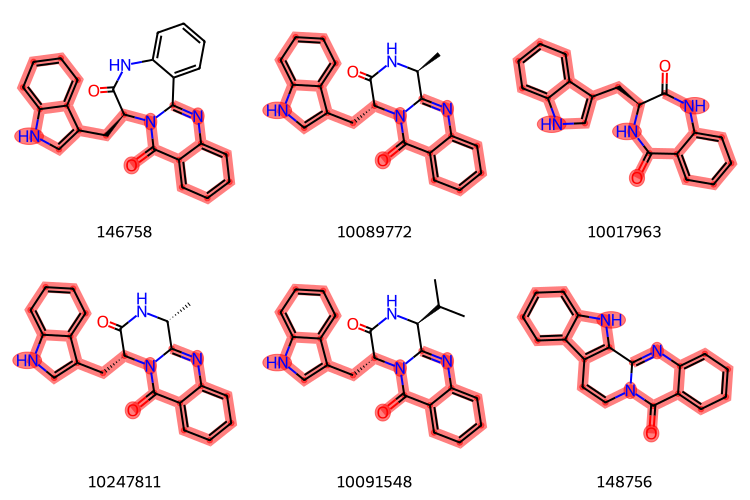

In [98]:
# and now highlight the matches
# Get a list of tuples with mols, mol_ids,
# and atom indices of substructure matches

mols_search = []
for mol in mols:

    # atom matches
    atom_ids = mol.GetSubstructMatch(mcs_mol)
    bond_ids = []
    
    # bond matches
    for bond in mcs_mol.GetBonds():
            begin_idx = atom_ids[bond.GetBeginAtomIdx()]
            end_idx = atom_ids[bond.GetEndAtomIdx()]
            bond_ids.append(mol.GetBondBetweenAtoms(begin_idx, end_idx).GetIdx())
    mols_search.append((mol, mol.GetProp('_Name'), atom_ids, bond_ids))

# index out what we need to plot
mols_to_draw = [x[0] for x in mols_search]
labels = [x[1] for x in mols_search]
atom_matches = [x[2] for x in mols_search]
bond_matches = [x[3] for x in mols_search]

# setup the grid canvas
drawer = setup_grid(mols_to_draw, num_molsPerRow=3, panel_size=250)

# Add highlight options
rgba_color = (1.0, 0, 0, 0.5) # transparent red
drawer.drawOptions().fillHighlights=True
drawer.drawOptions().setHighlightColour((rgba_color))
drawer.drawOptions().highlightRadius = 0.1
drawer.drawOptions().highlightBondWidthMultiplier=10

drawer.DrawMolecules(mols_to_draw, legends=labels, highlightAtoms=atom_matches, highlightBonds=bond_matches)
drawer.FinishDrawing()
show_png(drawer.GetDrawingText())

In [99]:
# Finally, here is one way to compute molecular similarity based on MCS
# See Vogt, M. et al. J Comput Aided Mol Des 2016, 30 (3), 191–208. 
# https://doi.org/10.1007/s10822-016-9906-3.
# https://github.com/vfscalfani/CSN_tutorial/blob/main/CSN_Jupyter_Notebooks/CSN_glucocorticoid_calculations_2.ipynb

def tc_mcs(mol1,mol2):
    # get maximum common substructure instance
    mcs = rdFMCS.FindMCS([mol1,mol2],timeout=30) # adding a 30 second timeout
    
    # get number of common bonds
    mcs_bonds = mcs.numBonds
    
    # get number of bonds for each
    # default is only heavy atom bonds
    mol1_bonds = mol1.GetNumBonds()
    mol2_bonds = mol2.GetNumBonds()
    
    # compute MCS-based Tanimoto
    tan_mcs = mcs_bonds / (mol1_bonds + mol2_bonds - mcs_bonds)
    return tan_mcs


In [100]:
tc_mcs(mol1,mol2)

0.8108108108108109

In [101]:
####################### END OF WORKSHOP CONTENT #######################

### Self-Study/Bonus Content

In [102]:
### Similarity Maps

In [103]:
# Similarity Maps are an interesting way to
# visualize molecular fingerprints and similarity
# https://jcheminf.biomedcentral.com/articles/10.1186/1758-2946-5-43

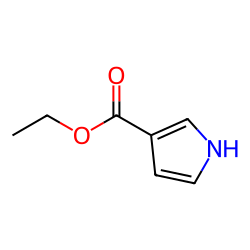

In [104]:
mol1 = Chem.MolFromSmiles('CCOC(=O)C1=CNC=C1')
mol1

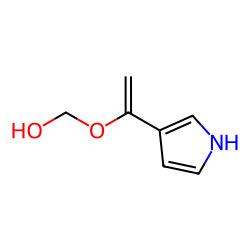

In [105]:
mol2 = Chem.MolFromSmiles('OCOC(=C)C1=CNC=C1')
mol2


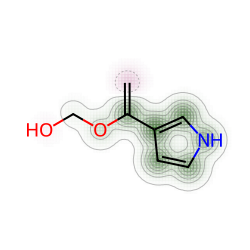

In [106]:
# Create a similarity map for mol2, in comparison to ref mol1
# Adapted from
# https://greglandrum.github.io/rdkit-blog/posts/2020-01-03-similarity-maps-with-new-drawing-code.html
from rdkit.Chem.Draw import SimilarityMaps

drawer = Draw.MolDraw2DSVG(250, 250)
_, maxWeight = SimilarityMaps.GetSimilarityMapForFingerprint(mol1, mol2, # mol1 is the reference mol, # mol2 the probe mol
                                        lambda m, i: SimilarityMaps.GetRDKFingerprint(m, i, nBits=1028, nBitsPerHash=1), 
                                        metric=DataStructs.TanimotoSimilarity,
                                        draw2d=drawer)
drawer.FinishDrawing()
SVG(drawer.GetDrawingText())

In [107]:
# Now try this with a set of mols
smiles_ref = 'CCOC(=O)C1=CNC=C1' # our reference mol

smiles = ['C\\C=C\\C(O)C1=CNC=C1F',
          'CCOC(Cl)C1=CN(C=C1)C(C)C',
          'CCC(C)OC(=O)C1=CNC=C1',
          'CCOC(OC)C1=CN(C)C=C1',
          'CCOC(=O)C1=CNC(C)=C1C']

ref_mol = Chem.MolFromSmiles(smiles_ref)
mols = []
for smi in smiles:
    mols.append(Chem.MolFromSmiles(smi))

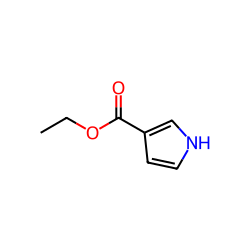

In [108]:
# Save PNG of Reference mol

from PIL import Image
import io
drawer = rdMolDraw2D.MolDraw2DCairo(250,250)
drawer.drawOptions().fixedBondLength = 30
drawer.DrawMolecule(ref_mol)
drawer.FinishDrawing()
ref_mol_png = drawer.GetDrawingText()
Image.open(io.BytesIO(ref_mol_png))

In [109]:
# Compute Tanimoto Similarities
ref_fp = Chem.RDKFingerprint(ref_mol,nBitsPerHash=1, fpSize=1024)

tan_sim = []
for mol in mols:
    fp = Chem.RDKFingerprint(mol,nBitsPerHash=1, fpSize=1024)
    sim_calc = round(DataStructs.TanimotoSimilarity(ref_fp,fp),3)
    tan_sim.append(sim_calc)

tan_sim

[0.251, 0.342, 0.83, 0.41, 0.521]

In [110]:
# Save similarity maps
sim_maps = []
for mol in mols:
    drawer = rdMolDraw2D.MolDraw2DCairo(250, 250)
    drawer.drawOptions().fixedBondLength = 30
    fig, maxWeight = SimilarityMaps.GetSimilarityMapForFingerprint(ref_mol, mol,
                                        lambda m, i: SimilarityMaps.GetRDKFingerprint(m, i, nBits=1028, nBitsPerHash=1), 
                                        metric=DataStructs.TanimotoSimilarity,
                                        draw2d=drawer)
    drawer.FinishDrawing()
    sim_maps.append(drawer.GetDrawingText())

In [111]:
# Add the reference mol
tan_sim.insert(0,'Reference Molecule')
sim_maps.insert(0,ref_mol_png)

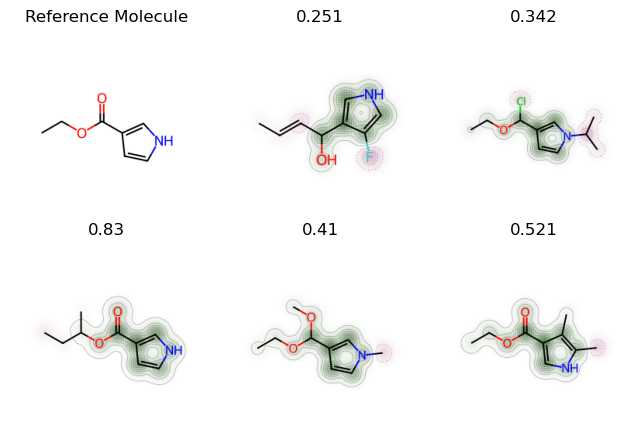

In [112]:
# Plot similarity maps in a grid with Matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

fig = plt.figure(figsize=(8, 8))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(2, 3),
                 axes_pad=0.2,
                 )

for ax,im,sim in zip(grid,sim_maps,tan_sim):
        ax.imshow(show_png(im), aspect='equal')
        ax.set_title(str(sim), fontsize = 12)
        ax.axis('off')
plt.show()

In [113]:
### Substructure Screening

In practice, many database substructure searches are screened with fingerprints to speed up the search. So, a (slower) full chemical graph match check is only necassary for molecules that pass the initial screen (Leach, A.R. and Gillet, V. J., An Introduction to Chemoinformatics, 2nd ed, pp 8-10).

The difference in a pre-screen will be more noticable for queries that are complete molecules (e.g., SMILES). See below for more information:

* https://www.nextmovesoftware.com/talks/Mayfield_SecretsOfFastSmartsMatching_Sheffield_201906.pdf
* https://www.daylight.com/meetings/emug00/Sayle/substruct.html


In [114]:
# Here is the basic idea
# get our test mols
mols = []
with Chem.SmilesMolSupplier('../X_Data/test_smiles.smi',titleLine=False, delimiter='\t',nameColumn=1) as suppl:
    for mol in suppl:
        if mol is not None:
            mols.append(mol)

In [115]:
# define the query
query = Chem.MolFromSmiles('C3(C2=NC1=CC=CC=C1C(=O)N2CC(=O)N3)')

# check for matches with HasSubStructMatch()
num = 0
for mol in mols:
    num += 1
    # count how many mols went through a full chemical graph match
    if mol.HasSubstructMatch(query):
       print(mol.GetProp('_Name'), 'match found')
print("Total HasSubstructMatch(query) checks: " + str(num))

10089772 match found
10247811 match found
10091548 match found
Total HasSubstructMatch(query) checks: 6


In [116]:
# Instead what we can do is screen the molecules first based on a fingerprint
# RDKit has a pattern fingerprint for this purpose: https://rdkit.blogspot.com/2013/11/fingerprint-based-substructure.html

# Let's take a look
mol1 = mols[1] # this should be a match
mol2 = mols[2] # this should not be a match

In [117]:
# compute pattern fingerprints
query_fp = Chem.PatternFingerprint(query)
fp1 = Chem.PatternFingerprint(mol1)
fp2 = Chem.PatternFingerprint(mol2)

In [118]:
# We can screen them like this:
from rdkit import DataStructs

# Returns True if all bits in match
print(DataStructs.AllProbeBitsMatch(query_fp, fp1))
print(DataStructs.AllProbeBitsMatch(query_fp, fp2))

True
False


In [119]:
# now let's rerun the substructure match with a screen
# check for matches with HasSubStructMatch()
num = 0
for mol in mols:
    # screen the match
    mol_fp = Chem.PatternFingerprint(mol)
    if DataStructs.AllProbeBitsMatch(query_fp, mol_fp):
       # count how many mols went through a full chemical graph match
       num += 1
       if mol.HasSubstructMatch(query):
          print(mol.GetProp('_Name'), 'match found')
print("Total HasSubstructMatch(query) checks: " + str(num))


10089772 match found
10247811 match found
10091548 match found
Total HasSubstructMatch(query) checks: 3


In [120]:
# We probably need a larger dataset to notice a difference in speed
# Let's test this with a 50,000 mols dataset from here:
# https://github.com/greglandrum/rdkit_blog/blob/master/data/chembl16_25K.pairs.txt.gz

# Code adapted from:
# http://rdkit.blogspot.com/2013/11/fingerprint-based-substructure.html

import gzip
ind = [x.split() for x in gzip.open('../X_Data/chembl16_25K.pairs.txt.gz')]
mols_fps = []
for i, row in enumerate(ind):
    # Convert the byte string to a regular string and split into columns
    row = [col.decode('utf-8') for col in row]

    mol1 = Chem.MolFromSmiles(row[1])
    mol_name1 = row[0]
    if mol1 is not None:
       mol_fp1 = Chem.PatternFingerprint(mol1)
       mols_fps.append((mol1, mol_fp1, mol_name1))

    mol2 = Chem.MolFromSmiles(row[3])
    mol_name2 = row[2]
    if mol2 is not None:
       mol_fp2 = Chem.PatternFingerprint(mol2)
       mols_fps.append((mol2, mol_fp2, mol_name2))

In [121]:
len(mols_fps)

50000

In [122]:
mols_fps[0:1]

[(<rdkit.Chem.rdchem.Mol at 0x7c99661c0a50>,
  '1158779')]

In [123]:
# Load a set of SMILES queries
# https://github.com/greglandrum/rdkit_blog/blob/master/data/zinc.leads.500.q.smi

line_number = 0
query_fps = []
with open('../X_Data/zinc.leads.500.q.smi', 'r') as infile:
    for line in infile:
        # Strip whitespace and add to the list
        smiles_line = line.strip()

        # save original data for an idx
        # create a unique query idx with id and original smiles
        # line_number--ZINC...--smiles
        splitted = smiles_line.split('\t')
        line_number +=1
        query_idx = str(line_number) + "--" + splitted[1] + "--" + splitted[0]
                
        query_mol = Chem.MolFromSmiles(smiles_line)
        if query_mol is not None:
           query_fp = Chem.PatternFingerprint(query_mol)
           query_fps.append(((query_idx,query_mol,query_fp)))

In [124]:
len(query_fps)

500

In [125]:
query_fps[0]

('1--ZINC00403244--C1CCO[C@@H](C1)ON2C(=O)CCC2=O',
 <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x7c9972133370>)

In [126]:
# Substructure match without pattern screen
# This will take a few minutes

from time import time
start_time = time()

total_queries_count = 0
found = {}

# loop through the list of query mols
for query_idx, query_mol, query_fp in query_fps:
    sub_matches = []

    # loop through the mols dataset and check if the query matches 
    for mol, mol_fp, mol_name in mols_fps:
        total_queries_count += 1
        sub_match = mol.HasSubstructMatch(query_mol)

        # if there is a match, append mol match data to sub_matches
        if sub_match:
           sub_matches.append((mol_name, mol))
    
    # if sub_matches exists, add it to the dictionary along with total 
    # number of matches for each query       
    if sub_matches:
       found[query_idx] = {'number of substructure matches': (len(sub_matches)),
                                      'mols_matches': sub_matches}

print(f"Compute time: {time()-start_time} seconds")

Compute time: 172.69542717933655 seconds


In [127]:
print("Number of query-mol comparisons: " + str(total_queries_count))
print("Number of total substructure matches: " + str(sum(len(value['mols_matches']) for value in found.values())))

Number of query-mol comparisons: 25000000
Number of total substructure matches: 1275


In [128]:
# Substructure match now with pattern fingerprint screen
start_time = time()

found = {}
total_queries_count = 0
screen_incorrect = 0
check_substructure_count = 0

# loop through the list of query mols
for query_idx, query_mol, query_fp in query_fps:
    sub_matches = []

    # loop through the mols dataset and compare pattern fingerprints
    for mol, mol_fp, mol_name in mols_fps:  
        total_queries_count += 1

        # check if the mol fingeprint passes the screen
        if DataStructs.AllProbeBitsMatch(query_fp, mol_fp):
           check_substructure_count +=1

           # now do a full substructure check
           sub_match = mol.HasSubstructMatch(query_mol)
           if sub_match:
              sub_matches.append((mol_name,mol))
           else:
              screen_incorrect += 1
    if sub_matches:
        found[query_idx] = {'number of matches': (len(sub_matches)),
                                      'mols_matches': sub_matches}

print(f"Compute time: {time()-start_time} seconds")

Compute time: 32.056246757507324 seconds


In [129]:
print("query-mol comparisons: " + str(total_queries_count))
num_eliminated = total_queries_count - check_substructure_count
num_total_matches = sum(len(value['mols_matches']) for value in found.values())
print("Eliminated query-mol comparisons based on pattern fingerprint: " + str(num_eliminated))
print("Actual 'HasSubstructMatch' searches: " + str(screen_incorrect + num_total_matches))
print("Cases where pattern fingerprint match is True, but substructure match False: " + str(screen_incorrect))
print("Total substructure matches: " + str(num_total_matches))

query-mol comparisons: 25000000
Eliminated query-mol comparisons based on pattern fingerprint: 24998219
Actual 'HasSubstructMatch' searches: 1781
Cases where pattern fingerprint match is True, but substructure match False: 506
Total substructure matches: 1275


In the above cases, note that both the number of total substructures matched (1275) regardless of whether we used a fingerprint screen or not. It's a good idea to check that number, as
it may be possible that there is a failure where the fingerprint screen eliminates an actual match. See here for examples: http://rdkit.blogspot.com/2013/11/fingerprint-based-substructure.html

In [130]:
# Number of unique query matches
len(found)

37

In [131]:
# Show all match counts:
for key,value in found.items():
    print(key, "  ", value["number of matches"])

20--ZINC02004049--CC(=O)SC    78
26--ZINC04335977--c1ccc2c(c1)-c3c4c(cccc4n[nH]3)C2=O    13
32--ZINC13362299--CCn1c(=O)n-2c(n1)COc3c2cccc3    1
60--ZINC04272152--c1cc2c(cc1N)COCO2    2
71--ZINC02571370--Cc1cc2cc(ccc2[nH]1)O    217
102--ZINC19615840--CN(C)C(F)F    1
120--ZINC00096040--c1ccc2c(c1)-c3ccccc3S(=O)(=O)N2    1
151--ZINC04807252--c1cn[nH]n1    384
153--ZINC04227998--c1cc(cnc1)n2ccnc2    3
155--ZINC13283774--c1cc2c(nc1)CC(=O)N2    3
165--ZINC00162129--c1cc2cccc3c2c(c1)C(=O)N3    9
190--ZINC12356946--c1cn2ccnc2cn1    56
196--ZINC01686405--c1ccc(cc1)c2c(cc3ccccc3[o+]2)O    1
218--ZINC01846598--C1COC=N1    64
233--ZINC01705111--Cc1c(n2c(ccn2)nn1)C    35
235--ZINC06645782--c1cc(ccc1C=Nn2cnnc2)O    2
265--ZINC05647467--c1ccc2c(c1)nc3n2c(=O)cn[nH]3    3
283--ZINC12940414--c1ccc(cc1)c2nc3cccnc3s2    4
288--ZINC00173203--c1ccc2c(c1)n3cnnc3s2    1
289--ZINC04726938--C1CC=COC1    87
292--ZINC00024727--c1cc(oc1)Cn2ccnc2S    1
314--ZINC04914414--c1cc2n(c1)CCC2    6
342--ZINC01723799--c1ccc